# EDA - Federico

Importamos librerías

In [8]:
import os
import pandas as pd

Cargamos los datos en un solo diccionario separados en dataframes

In [9]:

PATH = "../"
data_path = os.path.join(PATH, 'data')
data_files = os.listdir(data_path)

dataframes : dict[pd.DataFrame] = {}
for file in data_files:
    datafile_fullpath = os.path.join(data_path, file)
    dataframes[file.split(".")[0]] = pd.read_csv(datafile_fullpath)

¿Cuáles son las rutas más saturadas/ocupadas?

Se determinara la "ocupación" de la ruta como el total de paradas, *stop_times* , por cada ruta dados la información de los viajes realizados, *trips*. 

route_id
CMX0100Z1    1354
CMX0300L1     894
CMX0300L3     684
CMX0300L2     634
CMX0300L7     598
             ... 
CMX0900R7      18
CMX05300B      16
CMX090R11      14
CMX090R13      11
CMX05300A       6
Name: count, Length: 270, dtype: int64


<Axes: xlabel='route_id'>

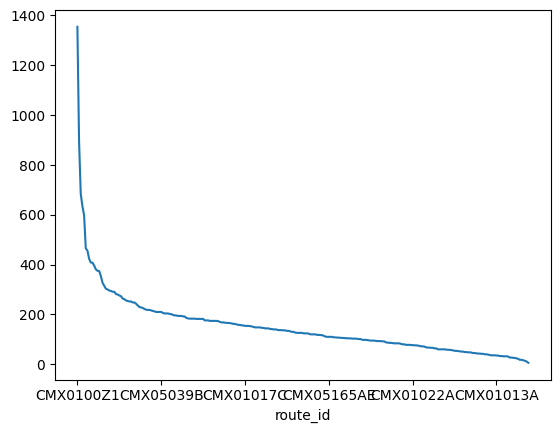

In [33]:
count_trips_routes = dataframes["stop_times"].merge(dataframes["trips"], on='trip_id')['route_id'].value_counts()
print(count_trips_routes)
count_trips_routes.plot()

Hallamos las 10 rutas más "ocupadas" dado los conteos anteriores

In [29]:
# Get the top 10 busiest routes
top_busiest_routes = dataframes["routes"].loc[dataframes["routes"]['route_id'].isin(count_trips_routes.head(10).index)]
top_busiest_routes

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
51,CMX0100Z1,CC,Z1,Zonal 1 Cuautepec,3,9B26B6,FFFFFF
62,CMX0300L7,MB,7,Indios Verdes - Campo Marte,3,116633,FFFFFF
66,CMX0300L3,MB,3,Tenayuca - Pueblo Sta. Cruz Atoyac,3,7A9A01,FFFFFF
67,CMX0300L2,MB,2,Tepalcates - Tacubaya,3,8D1A96,FFFFFF
68,CMX0300L1,MB,1,Indios Verdes - El Caminero,3,D40D0D,FFFFFF
73,CMX0400L5,TROLE,5,San Felipe de Jesús / Metro Hidalgo,3,1F5AF0,FFFFFF
74,CMX0400L4,TROLE,4,Metro Boulevard Puerto Aéreo / Metro El Rosario,3,1F5AF0,FFFFFF
196,CMX05013A,RTP,13-A,Metro Chapultepec - Torres de Padierna/Pedrega...,3,FC9408,FFFFFF
251,CMX050037,RTP,37,U.C.T.M. Atzacoalco - Carmen Serdán,3,F0D600,FFFFFF
255,CMX0547AX,RTP,47-A,Alameda Oriente - Xochimilco / Bosque de Nativ...,3,00A099,FFFFFF
